In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

#importing file
file = "./birthweight_low.xlsx"

birth = pd.read_excel(io = file)

#initial data check
birth.head(n=5)
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


Variables omaps and fmaps will not be part of the analysis since their results are not related to birthweight. Omaps and Fmaps are performed after birth. 

In [4]:
#building a base model

lm_practice = smf.ols(formula = """  bwght ~ mage +
                                            meduc +
                                            monpre +
                                            npvis +
                                            fage +
                                            feduc +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            fwhte +
                                            fblck """,
                    data = birth)

results = lm_practice.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     37.07
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.70e-43
Time:                        14:42:45   Log-Likelihood:                -1335.6
No. Observations:                 186   AIC:                             2699.
Df Residuals:                     172   BIC:                             2744.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4029.4709    314.737     12.803      0.0

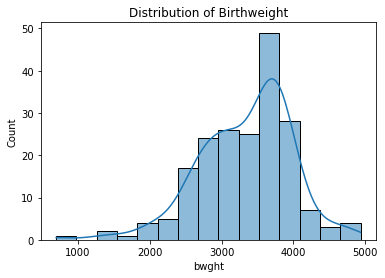

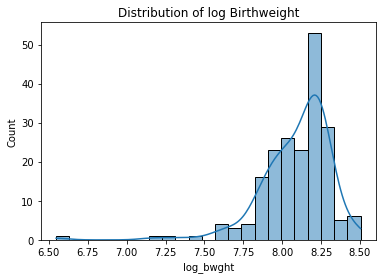

In [5]:
#developing a histogram of target variable, birthweight
sns.histplot(x='bwght',
            data = birth,
            kde = True)

plt.title("Distribution of Birthweight")
plt.show()

#comparing with a histogram of log of birthweight to see if it improves the skewness
birth['log_bwght'] = np.log(birth['bwght'])

sns.histplot(x='log_bwght',
            data = birth,
            kde = True)

plt.title("Distribution of log Birthweight")
plt.show()

log of Birthweight shows more skewness than original Birthweight, therefor log will not be used further in the analysis. 

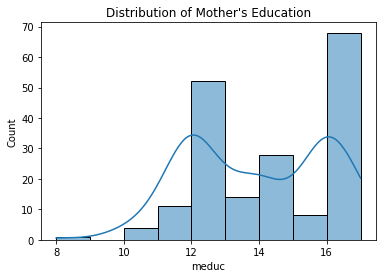

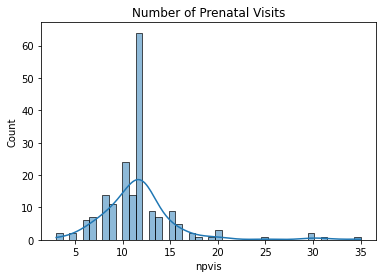

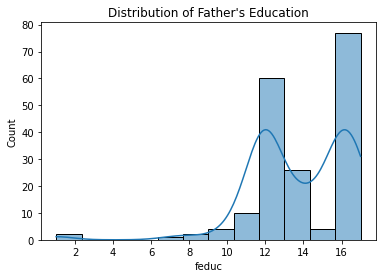

In [7]:
#checking for missing values
birth.isnull().sum(axis=0)

#handling the missing values
for col in birth:
    if birth[col].isnull().astype(float).sum() > 0:
        birth['m_'+col] = birth[col].isnull().astype(int)
        
birth[['m_meduc', 'm_npvis', 'm_feduc']].sum(axis=0)

#creating a dropped dataset to visualize meduc, npvis & feduc
birth_dropped = birth.dropna()

sns.histplot(x='meduc',
            data = birth_dropped,
            kde = True)

plt.title("Distribution of Mother's Education")
plt.show()

sns.histplot(x='npvis',
            data = birth_dropped,
            kde = True)

plt.title("Number of Prenatal Visits")
plt.show()

sns.histplot(x='feduc',
            data = birth_dropped,
            kde = True)

plt.title("Distribution of Father's Education")
plt.show()





Based on the visualizations the most appropriate imputations for the three values are to impute the missing values with the median. 
Due to the skewness of all three variables, the median is less affected than the mean by the few higher or lower points in the data. 


In [8]:
#imputing the missing values for meduc

fill_meduc = birth['meduc'].median()
birth['meduc'] = birth['meduc'].fillna(fill_meduc)

#imputing the missing values for feduc

fill_feduc = birth['feduc'].median()
birth['feduc'] = birth['feduc'].fillna(fill_meduc)

#imputing the missing values for npvis

fill_npvis = birth['npvis'].median()
birth['npvis'] = birth['npvis'].fillna(fill_npvis)

#check all missing values are filled
birth.isnull().sum(axis=0)

#dropping missing value columns
birth = birth.drop("m_meduc", axis = 1)
birth = birth.drop("m_npvis", axis = 1)
birth = birth.drop("m_feduc", axis = 1)

In [9]:
#checking correlation of variables with low birthweight

birth_corr = birth.corr(method = "pearson")

birth_corr["bwght"].round(3).sort_values(ascending = True)

drink       -0.743
cigs        -0.572
mage        -0.464
fage        -0.396
mwhte       -0.114
foth        -0.078
monpre      -0.052
fwhte       -0.041
moth        -0.022
npvis        0.062
meduc        0.094
male         0.115
fblck        0.118
mblck        0.126
feduc        0.131
omaps        0.250
fmaps        0.252
log_bwght    0.969
bwght        1.000
Name: bwght, dtype: float64

Text(0, 0.5, 'Birthweight')

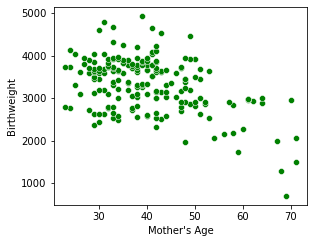

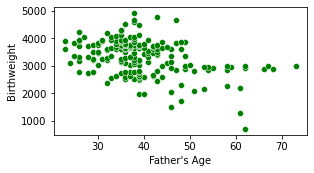

In [10]:
#making a scatterplot for mage and fage to analyse relationship to birthweight

#scatterplot for variable mage
fig,ax = plt.subplots(figsize = (10,8))
plt.subplot(2,2,1)
sns.scatterplot (x= birth['mage'],
                y = birth['bwght'],
                color = 'g')

plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = 'Birthweight')

#scatterplot for variable fage
fig,ax = plt.subplots(figsize = (10,8))
plt.subplot(3,2,1)
sns.scatterplot (x= birth['fage'],
                y = birth['bwght'],
                color = 'g')

plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = 'Birthweight')

Mother's Age has a stronger negative correlation than Father's Age, however both can be considered negatively correlated to 
birthweight. The older the parents are (especially the mother), the lower the birthweight of their baby. 

Focusing on mothers above 38 could possibly lead to higher significance in birth weight. 

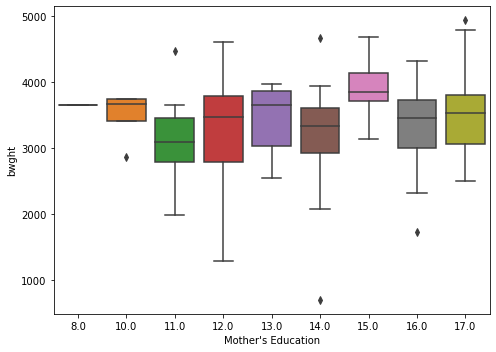

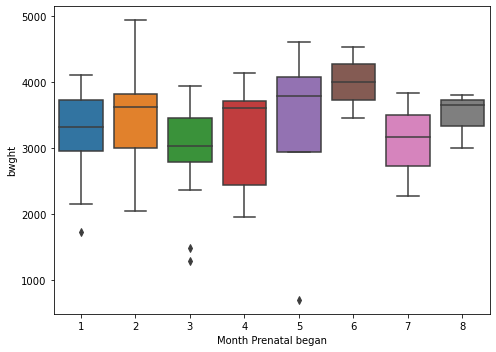

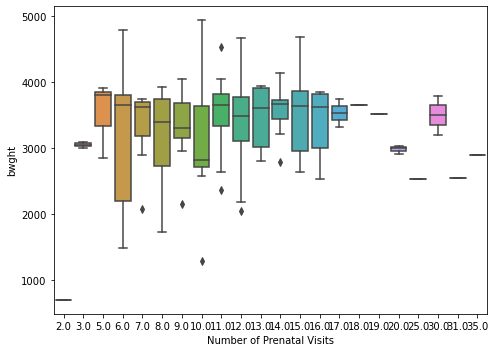

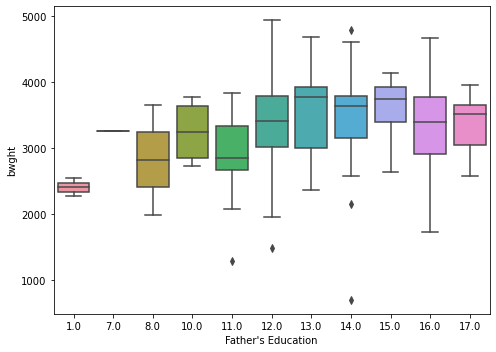

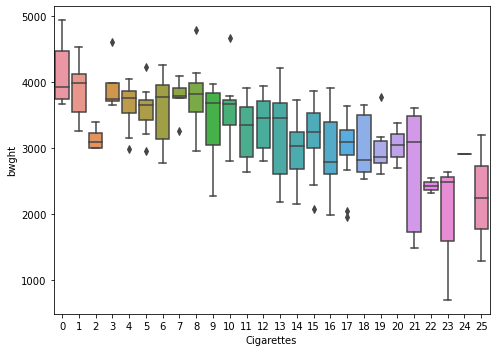

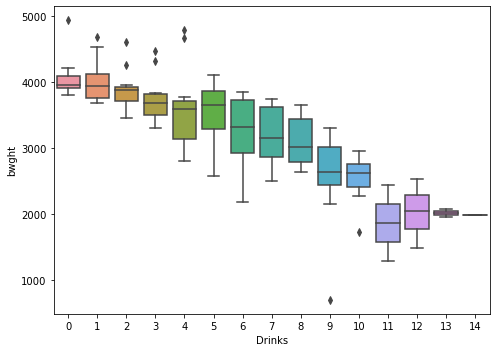

In [11]:
#making boxplot to analyze relationship of other interval variables and birthweight

#boxplot for meduc
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'meduc',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()

#boxplot for monpre
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'monpre',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Month Prenatal began")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()

#boxplot for npvis
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'npvis',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Number of Prenatal Visits")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()


#boxplot for feduc
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'feduc',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()

#boxplot for cigs
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'cigs',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Cigarettes")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()

#boxplot for drink
fig, ax = plt.subplots(figsize = (7, 5))

sns.boxplot(x = 'drink',
           y = 'bwght',
           data = birth)

plt.xlabel(xlabel = "Drinks")
plt.ylabel(ylabel = 'bwght')

plt.tight_layout()
plt.show()


In [12]:
#checking value counts to determine if trend is reliable with large enough sample in each category

birth['cigs'].value_counts()

13    15
11    13
17    12
5     11
16    11
14    11
9     11
8     11
10    10
0      9
6      9
15     9
12     9
1      8
4      8
19     6
7      5
21     5
18     5
2      4
3      4
23     3
25     2
22     2
20     2
24     1
Name: cigs, dtype: int64

Considering the value counts of all observations per sub-category and only referring to the ones with significant number of observations, the following trends are recognized:

Mother's Education:        increases (positively correlated) from 11 - 13 then dips down a bit and flattens. 

Month Prenatal care began: uneven sampling throughout sub-categories making it hard to establish trend. Beginning care
                           in month 1 and 2 however is much better than 3. 
                           
Number of Prenatal visits: can only consider the rage between 8 and 15 visits that have 9 or more observations. Within this                            range we see that having more than 10 visits ends up in higher birth weight for baby. 

Father's Education:        increases (positively correlated) from 11 - 13 then dips down a bit and flattens.

Drinks: negative correlation

Cigarettes: negative correlation

In [14]:
#counting the number of observations in each subcategory of the categorical data
is_male = len(birth['male'][birth['male'] == 1])
is_mwhte = len(birth['mwhte'][birth['mwhte'] == 1])
is_mblck = len(birth['mblck'][birth['mblck'] == 1])
is_moth = len(birth['moth'][birth['moth'] == 1])
is_fwhte = len(birth['fwhte'][birth['fwhte'] == 1])
is_fblck = len(birth['fblck'][birth['fblck'] == 1])
is_foth = len(birth['foth'][birth['foth'] == 1])


#printing results
print(f"""
            Yes\t\tNo
            ---------------------
is_male  |{is_male}\t\t{len(birth) - is_male}
is_mwhte |{is_mwhte}\t\t{len(birth) - is_mwhte}
is_mblck |{is_mblck}\t\t{len(birth) - is_mblck}
is_moth  |{is_moth}\t\t{len(birth) - is_moth}
is_fwhte |{is_fwhte}\t\t{len(birth) - is_fwhte}
is_fblck |{is_fblck}\t\t{len(birth) - is_fblck}
is_foth  |{is_foth}\t\t{len(birth) - is_foth}
""")


            Yes		No
            ---------------------
is_male  |108		88
is_mwhte |53		143
is_mblck |75		121
is_moth  |68		128
is_fwhte |68		128
is_fblck |67		129
is_foth  |61		135



Since the subcategories within the columns are not large enough for testing and training as they are (both 'Yes' and 'No' would need to be 100 observations), the features will need to be grouped or disregarded.

After analysing multiple variables independently and together in boxplots and correlations, the correlations of black parents as well as education level of parents are higher than other variables. This aligns with what was found in research. In the past years the US low birth rate was highest for black infants. Aditionally mothers who have fewer than 8 years of education are also more likely to give birth to low birthweight babies. This aligns with what was seen in our boxplot of the variable. 
These findings lead to the decision to group these two variables together.

In [15]:
#creating new variables grouping mothers and fathers of same race together
birth['pblck'] = birth['fblck'] * birth['mblck']
birth['pwhte'] = birth['fwhte'] * birth['mwhte']
birth['poth'] = birth['foth'] * birth['moth']

In [16]:
birth['peduc'] = birth['feduc'] * birth['meduc']

In [17]:
#creating a new variable grouping mage and fage together
birth['page'] = birth['mage'] * birth['fage']

In [18]:
birth['page_peduc'] = birth['page']*birth['peduc']

In [19]:
#making a new variable to combine drinks and cigs by first converting drinks per week to per day. 
birth['drink_day'] = round(birth['drink'] / 7, 1)
birth['drink_smoke'] = round(birth['drink_day'] * birth['cigs'], 0)

In [20]:
birth['drink_smoke_meduc'] = birth['meduc']*birth['drink_smoke']

In [21]:
#creating new dummy variable for higher mothers age
birth['has_higher_mage'] = 0

for index, val in birth.iterrows():
    if birth.loc[index, 'mage'] > birth['mage'].median():
        birth.loc[index, 'has_higher_mage'] = 1

print (birth['has_higher_mage'].value_counts())

#creating new dummy variable for higher fathers age
birth['has_higher_fage'] = 0

for index, val in birth.iterrows():
    if birth.loc[index, 'fage'] > birth['fage'].median():
        birth.loc[index, 'has_higher_fage'] = 1

print (birth['has_higher_fage'].value_counts())

0    104
1     92
Name: has_higher_mage, dtype: int64
0    108
1     88
Name: has_higher_fage, dtype: int64


In [22]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (7, 5))
    
    sns.boxplot(x    = cat_var,
                y    = response,
                data = data)
    
    plt.suptitle("")
    plt.show()

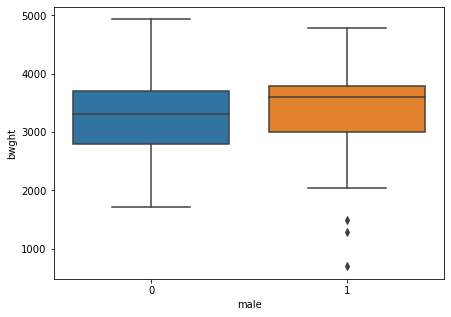

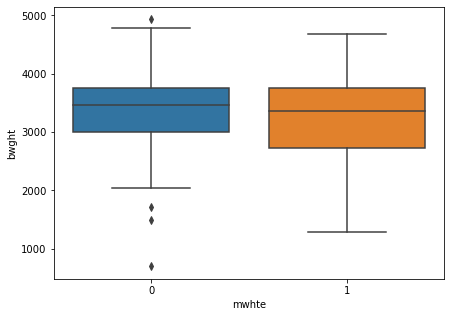

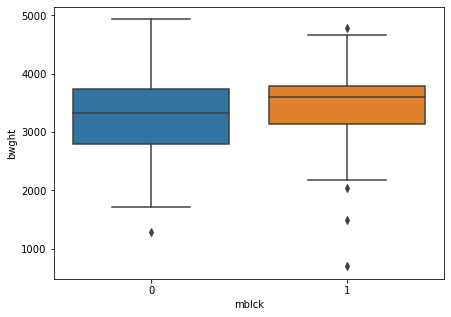

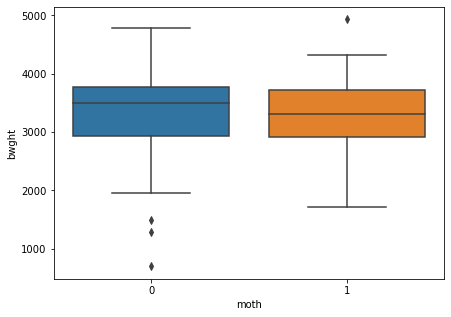

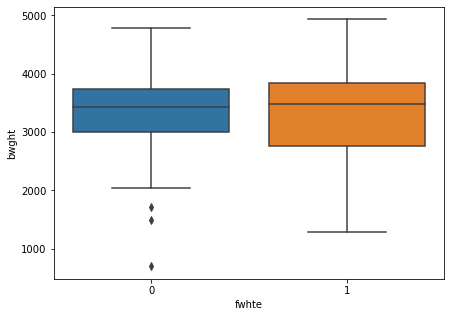

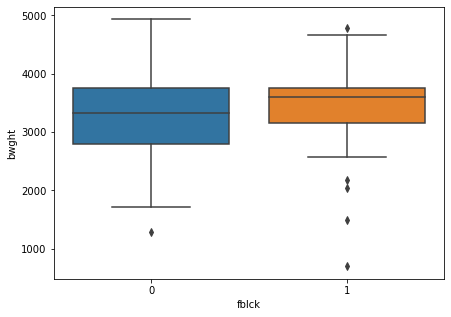

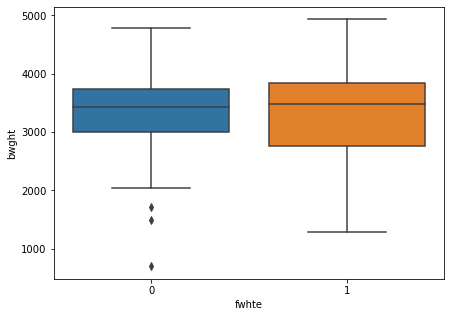

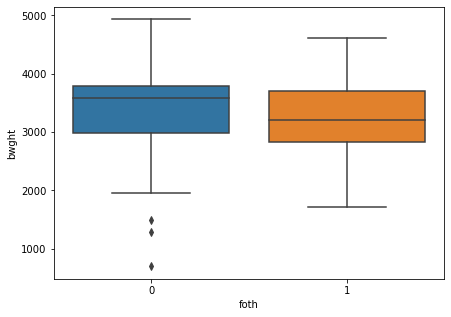

In [23]:
#calling fuction for all categorical variables
categorical_boxplots(response = 'bwght',
                    cat_var = 'male',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'mwhte',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'mblck',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'moth',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'fwhte',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'fblck',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'fwhte',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'foth',
                    data = birth)


In [25]:
#making a new variable combining pre natal care

birth['monpre_mage'] = birth['monpre'] * birth['mage']

In [26]:
#counting number of zeros for drink, cigs and drink_smoke
drink_day_zeroes = len(birth['drink_day'][birth['drink_day'] == 0])
cigs_zeroes = len(birth['cigs'][birth['cigs'] == 0])
drink_smoke_zeroes = len(birth['drink_smoke'][birth['drink_smoke'] == 0])

print(f"""
                 No\t\tYes
               ---------------------
Drink          | {drink_day_zeroes}\t\t{len(birth) - drink_day_zeroes}
Cigarettes     | {cigs_zeroes}\t\t{len(birth) - cigs_zeroes}
Drink_Smoke    | {drink_smoke_zeroes}\t\t{len(birth) - drink_smoke_zeroes}
""")


                 No		Yes
               ---------------------
Drink          | 11		185
Cigarettes     | 9		187
Drink_Smoke    | 25		171



There are not enough observations with zero to engineer flag features for these variables. Therefor they will be kept in the regression as is. 

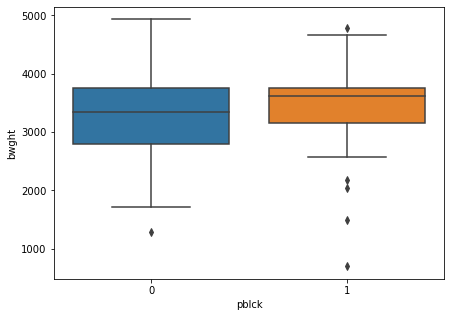

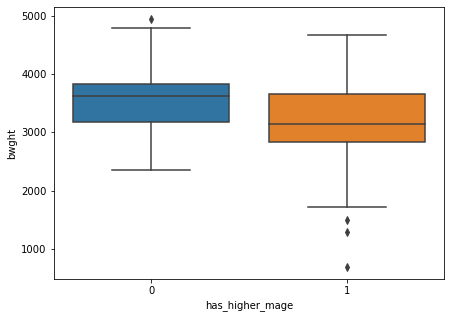

In [30]:
#calling boxplot function for newly engineered features
categorical_boxplots(response = 'bwght',
                    cat_var = 'pblck',
                    data = birth)

categorical_boxplots(response = 'bwght',
                    cat_var = 'has_higher_mage',
                    data = birth)


Text(0, 0.5, 'Birthweight')

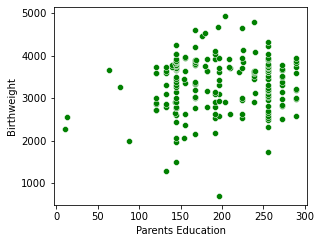

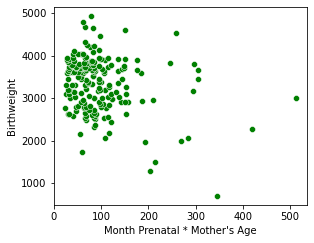

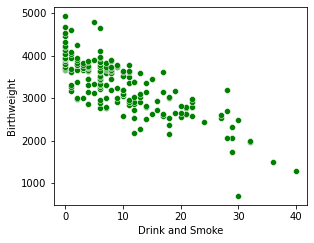

In [31]:
#scatterplot for newly engineered features

fig,ax = plt.subplots(figsize = (10,8))
plt.subplot(2,2,1)
sns.scatterplot (x= birth['peduc'],
                y = birth['bwght'],
                color = 'g')

plt.xlabel(xlabel = "Parents Education")
plt.ylabel(ylabel = 'Birthweight')

fig,ax = plt.subplots(figsize = (10,8))
plt.subplot(2,2,1)
sns.scatterplot (x= birth['monpre_mage'],
                y = birth['bwght'],
                color = 'g')

plt.xlabel(xlabel = "Month Prenatal * Mother's Age")
plt.ylabel(ylabel = 'Birthweight')



fig,ax = plt.subplots(figsize = (10,8))
plt.subplot(2,2,1)
sns.scatterplot (x= birth['drink_smoke'],
                y = birth['bwght'],
                color = 'g')

plt.xlabel(xlabel = "Drink and Smoke")
plt.ylabel(ylabel = 'Birthweight')

In [32]:
birth_corr = birth.corr(method = "pearson")

birth_corr["bwght"].round(3).sort_values(ascending = True)

drink_smoke         -0.800
drink_smoke_meduc   -0.760
drink_day           -0.748
drink               -0.743
cigs                -0.572
page                -0.505
mage                -0.464
fage                -0.396
has_higher_fage     -0.344
page_peduc          -0.335
has_higher_mage     -0.274
monpre_mage         -0.252
poth                -0.122
pwhte               -0.114
mwhte               -0.114
foth                -0.078
monpre              -0.052
fwhte               -0.041
moth                -0.022
npvis                0.062
meduc                0.094
pblck                0.114
male                 0.115
peduc                0.116
fblck                0.118
mblck                0.126
feduc                0.131
omaps                0.250
fmaps                0.252
log_bwght            0.969
bwght                1.000
Name: bwght, dtype: float64

In [34]:
#dropping y-variables and variables that are not significant for the regression problem
birth_explanatory = birth.copy()

birth_explanatory = birth_explanatory.drop(['bwght', 
                                           'log_bwght',
                                           'omaps',
                                           'fmaps'],
                                          axis = 1)

for val in birth_explanatory:
    print(f"{val} +")
    

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
pblck +
pwhte +
poth +
peduc +
page +
page_peduc +
drink_day +
drink_smoke +
drink_smoke_meduc +
has_higher_mage +
has_higher_fage +
monpre_mage +


In [40]:
lm_practice = smf.ols(formula = """  bwght ~
mage +
fage +
cigs +
page +
drink_day +
drink_smoke +
drink_smoke_meduc """,
                    data = birth)

results = lm_practice.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     75.87
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.18e-51
Time:                        15:01:43   Log-Likelihood:                -1414.6
No. Observations:                 196   AIC:                             2845.
Df Residuals:                     188   BIC:                             2871.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3271.9889    500.48

Ran a full OLS model with all variables and diminished variables with p-values above 0.05 until coming to the result above. Best model has an R^2 of 73 and only considered parents ages, drinking and smoking as significant to birth weight.

In [41]:
#importing libraries for linear regression and train/test split
import statsmodels.formula.api as smf  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

#preparing response variable
birth_target = birth.loc[ :, 'bwght']

#preparing testing and training sets
x_train, x_test, y_train, y_test = train_test_split(birth_explanatory,
                                                   birth_target,
                                                   test_size = 0.25,
                                                   random_state = 219)

#checking shape of the data sets

print(f"""
Training data : {x_train.shape}, {y_train.shape}
Testing data  : {x_test.shape}, {y_test.shape}
""")



Training data : (147, 27), (147,)
Testing data  : (49, 27), (49,)



In [47]:
#OLS Regression
#merging x_train and y_train 
birth_train = pd.concat([x_train, y_train], axis = 1)

#building model
lm_best = smf.ols(formula = """bwght ~ mage +
                            fage +
                            cigs +
                            page +
                            drink_day +
                            drink_smoke """,
                          data = birth_train)

#fitting the model
results = lm_best.fit()

#analysing summary output
print(results.summary())
                 





                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     94.85
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.13e-39
Time:                        15:04:30   Log-Likelihood:                -1069.1
No. Observations:                 147   AIC:                             2148.
Df Residuals:                     142   BIC:                             2163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4481.2151    120.559     37.170      

In [60]:
x_variables = ['mage', 'fage', 'page', 'cigs', 'drink_day', 'drink_smoke']

#preparing x-variables for OLS
ols_data = birth.loc[:, x_variables]

#preparing separate test set for OLS
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(ols_data,
                                                                   birth_target,
                                                                   test_size = 0.25,
                                                                   random_state = 219)
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4)) 
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) 

lr_train_score =  lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7428
OLS Testing Score  : 0.6575
OLS Train-Test Gap : 0.0853


The gap between training and testing is too large. This model is no good. 

In [50]:
import sklearn.linear_model

#instantiating
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, normalize = True)

#fitting and predicting
lasso_fit = lasso_model.fit(x_train, y_train)
lasso_pred = lasso_fit.predict(x_test)

#scoring results
print('Lasso Training Score:', lasso_model.score(x_train,y_train).round(4))
print('Lasso Testing Score:', lasso_model.score(x_test,y_test).round(4))

#saving scoring data 
lasso_train_score = lasso_model.score(x_train, y_train).round(4)
lasso_test_score = lasso_model.score(x_test, y_test).round(4)

#displaying and saving gap
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


Lasso Training Score: 0.7473
Lasso Testing Score: 0.6151
Lasso Train-Test Gap : 0.1322


In [51]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_explanatory.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4094.12)
('mage', -5.88)
('meduc', 14.91)
('monpre', 0.0)
('npvis', 0.0)
('fage', 0.0)
('feduc', 16.62)
('cigs', -13.11)
('drink', -52.32)
('male', 59.5)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -54.41)
('fwhte', 0.0)
('fblck', -0.0)
('foth', -0.0)
('pblck', -0.0)
('pwhte', 2.53)
('poth', -12.41)
('peduc', 0.0)
('page', -0.15)
('page_peduc', 0.0)
('drink_day', -0.0)
('drink_smoke', -30.29)
('drink_smoke_meduc', -0.0)
('has_higher_mage', 24.41)
('has_higher_fage', 14.41)
('monpre_mage', -0.0)


In [52]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4094.12)
('mage', -5.88)
('meduc', 14.91)
('npvis', 0.0)
('feduc', 16.62)
('cigs', -13.11)
('drink', -52.32)
('male', 59.5)
('mblck', 0.0)
('moth', -54.41)
('fblck', -0.0)
('pblck', -0.0)
('pwhte', 2.53)
('poth', -12.41)
('page', -0.15)
('drink_day', -0.0)
('drink_smoke', -30.29)
('has_higher_mage', 24.41)
('has_higher_fage', 14.41)


In [53]:
# instantiating ard model
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test,y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test,y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7499
Testing Score : 0.6204
ARD Train-Test Gap : 0.1295


In [57]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_explanatory.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4011.71)
('mage', -0.00022)
('meduc', 0.00132)
('monpre', 0.00066)
('npvis', 0.00017)
('fage', 9.70765)
('feduc', 0.00315)
('cigs', -13.29403)
('drink', -51.33939)
('male', 44.6477)
('mwhte', 0.00098)
('mblck', 0.00014)
('moth', -49.78508)
('fwhte', 0.00029)
('fblck', -1e-05)
('foth', -0.00037)
('pblck', -0.00019)
('pwhte', 0.00098)
('poth', -0.0023)
('peduc', 1.03544)
('page', -0.33225)
('page_peduc', 0.0)
('drink_day', -0.00139)
('drink_smoke', -31.19121)
('drink_smoke_meduc', 0.0013)
('has_higher_mage', 33.11118)
('has_higher_fage', 0.00108)
('monpre_mage', 0.00018)


In [58]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4011.71)
('mage', -0.00022)
('meduc', 0.00132)
('monpre', 0.00066)
('npvis', 0.00017)
('fage', 9.70765)
('feduc', 0.00315)
('cigs', -13.29403)
('drink', -51.33939)
('male', 44.6477)
('mwhte', 0.00098)
('mblck', 0.00014)
('moth', -49.78508)
('fwhte', 0.00029)
('fblck', -1e-05)
('foth', -0.00037)
('pblck', -0.00019)
('pwhte', 0.00098)
('poth', -0.0023)
('peduc', 1.03544)
('page', -0.33225)
('drink_day', -0.00139)
('drink_smoke', -31.19121)
('drink_smoke_meduc', 0.0013)
('has_higher_mage', 33.11118)
('has_higher_fage', 0.00108)
('monpre_mage', 0.00018)


In [59]:
print(f"""
Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
*OLS       {lr_train_score}           {lr_test_score}           {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}           {ard_test_gap}


*this is my final model
""")





Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
*OLS       0.7501           0.6593           0.0908
Lasso      0.7473           0.6151           0.1322
ARD        0.7499           0.6204           0.1295


*this is my final model

